In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

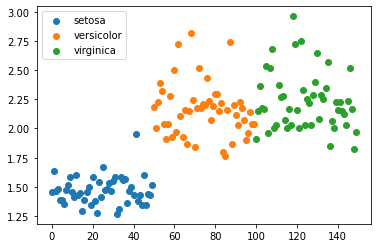

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

ratio = iris["sepal_length"]/iris["sepal_width"]

for name, group in iris.groupby("species"):
    plt.scatter(group.index, ratio[group.index], label=name)

plt.legend()
plt.show()

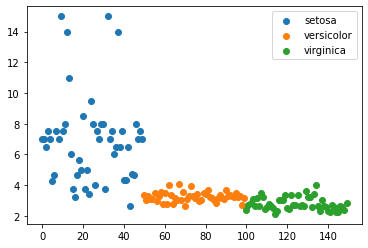

In [ ]:
import seaborn as sns
iris = sns.load_dataset("iris")

ratio = iris["petal_length"]/iris["petal_width"]

for name, group in iris.groupby("species"):
    plt.scatter(group.index, ratio[group.index], label=name)

plt.legend()
plt.show()

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df["X0"] = 1
display(iris_df)
print("Target Values:", iris_df.target.unique())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,X0
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


Target Values: [0 1 2]


In [ ]:
features = [f for f in iris_df.columns if f != 'target']
label_name = ['Y0', 'Y1', 'Y2']
label = [0, 1, 2]

In [ ]:
def createY(train_Y, label):
  arr = np.array(train_Y)
  for i in range(len(arr)):
    arr[i] = 1 if arr[i] == label else 0
  return arr

In [ ]:
def oneHotEncoding(df, label_name, label):
  for i in range(len(label)):
    df[label_name[i]] = pd.Series(createY(df['target'], label[i]))

In [ ]:
def predict(weight, sample):
    return 1 / (1 + np.exp(-1 * np.sum(np.multiply(weight, sample))))

In [ ]:
def singleLayerPerceptron(train_X, train_Y, alpha, rho, max_epoch, validation_X = None, validation_Y = None):
    m = len(train_X)
    m_validation = len(validation_X)
    no_of_features = len(train_X[0])
    no_of_class = len(train_Y[0])

    weights = np.zeros((no_of_class, no_of_features))
    curr_loss = prev_loss = float("inf")
    hX = np.zeros(no_of_class)
    loss = []
    epoch = 0
    validation_loss = 0
    validation_loss_list = []
    for _ in range(max_epoch):
        epoch += 1
        enum = np.arange(m)
        np.random.shuffle(enum)
        curr_loss = 0
        validation_loss = 0
        for i in enum:
            # predict values
            for j in range(no_of_class):
                hX[j] = predict(weights[j], train_X[i])
            # error calc
            curr_loss += np.sum(np.square(hX - train_Y[i])) / 2
            
            # weight updation
            for j in range(no_of_class):
                for k in range(no_of_features):
                    weights[j][k] += alpha * (train_Y[i][j] - hX[j]) * train_X[i][k] * hX[j] * (1 - hX[j])

        for i in range(m_validation):
            # predict values
            for j in range(no_of_class):
                hX[j] = predict(weights[j], validation_X[i])
            # error calc
            validation_loss += np.sum(np.square(hX - validation_Y[i])) / 2

        loss.append(curr_loss)
        validation_loss_list.append(validation_loss)

        # print("Epoch:", epoch, "\tLoss:", curr_loss)
        if abs(curr_loss - prev_loss) < rho:
            break
        prev_loss = curr_loss
    print("No. of Epoch:", epoch, "\tLoss:", curr_loss)
    plt.plot(np.arange(epoch), loss)
    plt.plot(np.arange(epoch), validation_loss_list)

    plt.show()
    return weights

In [ ]:
def predictClass(model, val_X):
    predicted = np.zeros(len(val_X), dtype=np.int8)
    for i in range(len(val_X)):
        prob = np.array([predict(weight, val_X[i]) for weight in model])
        predicted[i] = np.argmax(prob)
        # print(prob)
    return predicted

In [ ]:
def accuracy(predicted, val_Y):
  return 1 - (np.count_nonzero(np.subtract(predicted, val_Y)) / len(val_Y))

In [ ]:
def precision(predicted, val_Y, label):
    true = 0
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == label and val_Y[i] == label:
            true += 1
        if predicted[i] == label:
            total += 1
    if total == 0:
        return 0
    else:
        return true/total

In [ ]:
def recall(predicted, val_Y, label):
    true = 0
    total = 0
    for i in range(len(predicted)):
        if predicted[i] == label and val_Y[i] == label:
            true += 1
        if val_Y[i] == label:
            total += 1
    if total == 0:
        return 0
    else:
        return true/total

In [ ]:
def printMetrics(model, test_X, actual):
    predicted = predictClass(model, test_X)
    # print(predicted)
    print("\nOverAll Accuracy: {:.2%}".format(accuracy(predicted, actual)))
    for i in range(3):
        print("Precision for class {}: {:.2%}".format(i, precision(predicted, actual, i)))
    print()
    for i in range(3):
        print("Recall for class {}: {:.2%}".format(i, recall(predicted, actual, i)))

In [ ]:
oneHotEncoding(iris_df, label_name, label)
display(iris_df) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,X0,Y0,Y1,Y2
0,5.1,3.5,1.4,0.2,0,1,1,0,0
1,4.9,3.0,1.4,0.2,0,1,1,0,0
2,4.7,3.2,1.3,0.2,0,1,1,0,0
3,4.6,3.1,1.5,0.2,0,1,1,0,0
4,5.0,3.6,1.4,0.2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,0,0,1
146,6.3,2.5,5.0,1.9,2,1,0,0,1
147,6.5,3.0,5.2,2.0,2,1,0,0,1
148,6.2,3.4,5.4,2.3,2,1,0,0,1


In [ ]:
iris_df = iris_df.sample(frac=1)

norm = MinMaxScaler()
norm_fit = norm.fit(iris_df[features])
iris_X = norm_fit.transform(iris_df[features])


iris_Y = np.array(iris_df[label_name])
iris_label = np.array(iris_df['target'])
print(len(iris_Y))
print(len(iris_label))
print(len(iris_X))



150
150
150


In [ ]:
iris_X, iris_X_validation, iris_label, iris_label_validation, iris_Y, iris_Y_validation = train_test_split(iris_X, iris_Y, iris_label, test_size=0.1, random_state=42)

No. of Epoch: 1000 	Loss: 1.860245365970262


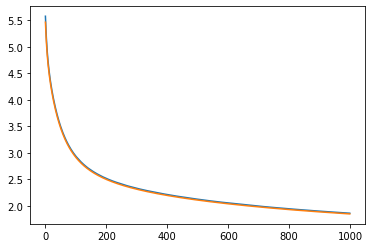

In [ ]:
alpha = 0.1
rho = 1e-6
max_epoch = 1000

model = singleLayerPerceptron(iris_X_validation, iris_label_validation, alpha, rho, max_epoch, iris_X_validation, iris_label_validation)

No. of Epoch: 10000 	Loss: 1.8496786251750559


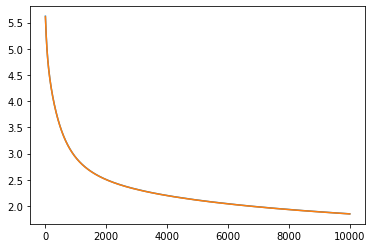

In [ ]:
alpha = 0.01
rho = 1e-6
max_epoch = 10000

model = singleLayerPerceptron(iris_X_validation, iris_label_validation, alpha, rho, max_epoch, iris_X_validation, iris_label_validation)


No. of Epoch: 1541 	Loss: 1.3997221499531947


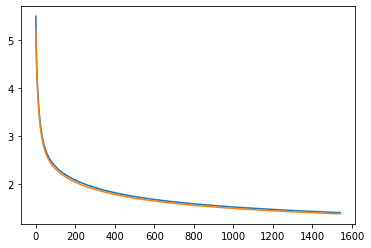

In [ ]:
alpha = 0.3
rho = 1e-6
max_epoch = 100000

model = singleLayerPerceptron(iris_X_validation, iris_label_validation, alpha, rho, max_epoch, iris_X_validation, iris_label_validation)


Fold:  1
No. of Epoch: 3285 	Loss: 15.486860431389664


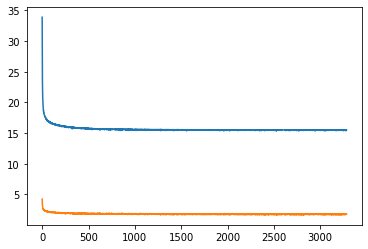


OverAll Accuracy: 66.67%
Precision for class 0: 100.00%
Precision for class 1: 61.54%
Precision for class 2: 60.00%

Recall for class 0: 100.00%
Recall for class 1: 66.67%
Recall for class 2: 54.55%

Fold:  2
No. of Epoch: 12284 	Loss: 17.007780438565895


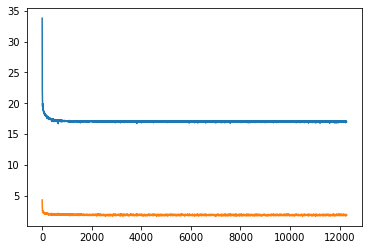


OverAll Accuracy: 81.48%
Precision for class 0: 100.00%
Precision for class 1: 83.33%
Precision for class 2: 63.64%

Recall for class 0: 100.00%
Recall for class 1: 55.56%
Recall for class 2: 87.50%

Fold:  3
No. of Epoch: 20175 	Loss: 16.407134123019244


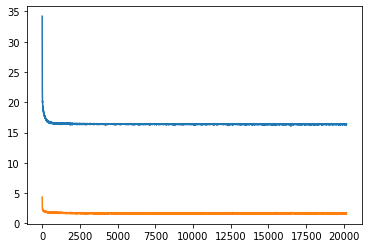


OverAll Accuracy: 77.78%
Precision for class 0: 92.31%
Precision for class 1: 50.00%
Precision for class 2: 70.00%

Recall for class 0: 100.00%
Recall for class 1: 33.33%
Recall for class 2: 77.78%

Fold:  4
No. of Epoch: 42235 	Loss: 15.244562054199212


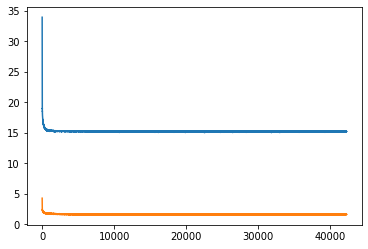


OverAll Accuracy: 70.37%
Precision for class 0: 100.00%
Precision for class 1: 62.50%
Precision for class 2: 58.33%

Recall for class 0: 100.00%
Recall for class 1: 50.00%
Recall for class 2: 70.00%

Fold:  5
No. of Epoch: 33545 	Loss: 16.683436228504057


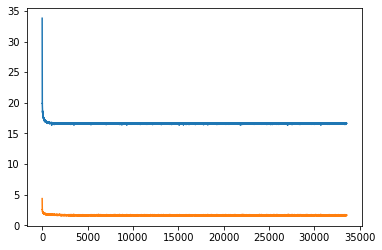


OverAll Accuracy: 88.89%
Precision for class 0: 100.00%
Precision for class 1: 72.73%
Precision for class 2: 100.00%

Recall for class 0: 100.00%
Recall for class 1: 100.00%
Recall for class 2: 62.50%



In [ ]:
kf = KFold(n_splits=5)

alpha = 0.3
rho = 1e-6
max_epoch = 100000

fold = 0
for train_index, test_index in kf.split(iris_X):
    fold += 1
    print("Fold: ", fold)
    
    X_train, X_test = iris_X[train_index], iris_X[test_index]
    y_train, y_test = iris_Y[train_index], iris_Y[test_index]
    label_train, label_test = iris_label[train_index], iris_label[test_index]

    model = singleLayerPerceptron(X_train, label_train, alpha, rho, max_epoch, iris_X_validation, iris_label_validation)
    printMetrics(model, X_test, y_test)
    print()

  